In [89]:
# numerical fun with Brady, Georgia and Markus
# insert comments and notes in this cell

In [90]:
# import packages

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d

In [93]:
# define parameters

# We solve the PDE on $[0,1]^2 \times [0,T]$

N = 100-1 # we assume M = N and the index for our spatial points goes 0,...,N+1, so 1,...,N are the inner spatial points
h = 1/(N+1) # spatial step size

T = 0.1
N_time = 1000-1 # the index for our time points goes 0,...,N_time + 1, so 1,...,N_time are the inner time points
tau = T/(N_time + 1) # temporal step size

beta = 1 # we assume beta to be positive
gamma = 1 # we assume gamma to be positive

print("tau = ", tau)
print("h = ", h)

tau =  0.0001
h =  0.01


In [94]:
# define initial and coefficient functions for PDE

def alpha(x,y):
    """alpha must be a continuous and strictly positive function on Omega = [0,1]^2 """
    
    #val = (x-1)**2 + (y-1)**2 + 1
    
    val = 1
    
    return val

def v_0(x,y):
    """initial function for v at t = 0. we assume that v_0 is C^1 on Omega = [0,1]^2"""
    
    val = (x-0.5)**2 + (y-0.5)**2
    
    #val = 1
    
    return val
    

In [95]:
# define main functions

def cart_coord(m, n, t, h = h, tau = tau):
    """Get cartesian coordinates from indices"""
    
    x = h*m
    y = h*n
    tt = tau*t
    
    return (x,y,tt)

def solve_pde(N = N, T = T, N_time = N_time, beta = beta, gamma = gamma, alpha = alpha, v_0 = v_0):
    
    # define spatial and temporal stepsize
    h = 1/(N+1)
    tau = T/(N_time + 1)
    
    # preallocate list, will be filled with matrices, each matrix corresponding to one spatial slice at constant t
    pde_solution = [None]*(N_time + 2)
    
    # compute solutions by stepping through time
    for t in range(N_time + 2):
        
        # compute initial values at t = 0 via v_0
        if t == 0:
            S_current = np.zeros((N+2,N+2))
            for m in range(N+2):
                for n in range(N+2):
                    (x,y,tt) = cart_coord(m = m, n = n, t = t, h = h, tau = tau)
                    S_current[m,n] = v_0(x,y)
            
            # save current solution
            pde_solution[t] = S_current
            
        
        # run our scheme with forward difference quotient in time
        else:
            
            # compute inner spatial points for t = 1
            
            S_current = np.zeros((N+2,N+2))
            S_old = pde_solution[t-1]
            
            for m in range(1,N+1):
                for n in range(1,N+1):
                    
                    (x,y,tt) = cart_coord(m = m, n = n, t = t, h = h, tau = tau)
                    (x_plus,y_plus,tt) = cart_coord(m = m + 1, n = n + 1, t = t, h = h, tau = tau)
                    (x_minus, y_minus, tt) = cart_coord(m = m - 1, n = n - 1, t = t, h = h, tau = tau)
                    
                    A = alpha(x,y)*(S_old[m+1,n] + S_old[m-1,n] - 4*S_old[m,n] + S_old[m,n+1] + S_old[m,n-1])
                    
                    B = (1/4)*(alpha(x_plus,y) - alpha(x_minus,y))*(S_old[m+1,n] - S_old[m-1,n])
                    
                    C = (1/4)*(alpha(x,y_plus) - alpha(x,y_minus))*(S_old[m,n+1]-S_old[m,n-1])
                    
                    bracket = A + B + C
                    
                    S_current[m,n] = S_old[m,n] + (tau/(gamma*(h**2))) * bracket
                    
            
            # compute boundary values using boundary condition
            
            for n in range(1,N+1):
                (x,y,tt) = cart_coord(m = 0, n = n, t = t, h = h, tau = tau)
                S_current[0,n] = -(S_current[2,n] - 4*S_current[1,n])/(3 + (2*h*beta/alpha(0,y)))
                S_current[N+1,n] = (4*S_current[N,n] - S_current[N-1,n])/(3 + (2*h*beta/alpha(1,y)))
            
            for m in range(1,N+1):
                (x,y,tt) = cart_coord(m = m, n = 0, t = t, h = h, tau = tau)
                S_current[m,0] = -(S_current[m,2] - 4*S_current[m,1])/(3 + (2*h*beta/alpha(x,0)))
                S_current[m,N+1] = (4*S_current[m,N] - S_current[m,N-1])/(3 + (2*h*beta/alpha(x,1)))
            
            
            # compute values at the four corners averaging their three neighbours
            
            S_current[0,0] = (S_current[0,1] + S_current[1,0] + S_current[1,1])/3
            S_current[0, N+1] = (S_current[1,N+1] + S_current[0,N] + S_current[1,N])/3
            S_current[N+1,0] = (S_current[N,0] + S_current[N+1,1] + S_current[N,1])/3
            S_current[N+1,N+1] = (S_current[N,N+1] + S_current[N+1,N] + S_current[N,N])/3
            
            # save current solution
            pde_solution[t] = S_current

    return pde_solution

In [96]:
# compute and print solutions

pde_solution = solve_pde(N = N, T = T, N_time = N_time, beta = beta, gamma = gamma, alpha = alpha, v_0 = v_0)

for S in pde_solution:
    print(S)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_s

[[0.5    0.4901 0.4804 ... 0.4804 0.4901 0.5   ]
 [0.4901 0.4802 0.4705 ... 0.4705 0.4802 0.4901]
 [0.4804 0.4705 0.4608 ... 0.4608 0.4705 0.4804]
 ...
 [0.4804 0.4705 0.4608 ... 0.4608 0.4705 0.4804]
 [0.4901 0.4802 0.4705 ... 0.4705 0.4802 0.4901]
 [0.5    0.4901 0.4804 ... 0.4804 0.4901 0.5   ]]
[[0.48061943 0.48062914 0.47099338 ... 0.47099338 0.48062914 0.48061943]
 [0.48062914 0.4806     0.4709     ... 0.4709     0.4806     0.48062914]
 [0.47099338 0.4709     0.4612     ... 0.4612     0.4709     0.47099338]
 ...
 [0.47099338 0.4709     0.4612     ... 0.4612     0.4709     0.47099338]
 [0.48062914 0.4806     0.4709     ... 0.4709     0.4806     0.48062914]
 [0.48061943 0.48062914 0.47099338 ... 0.47099338 0.48062914 0.48061943]]
[[0.45916992 0.45812574 0.45840182 ... 0.45840182 0.45812574 0.45916992]
 [0.45812574 0.46125828 0.46149338 ... 0.46149338 0.46125828 0.45812574]
 [0.45840182 0.46149338 0.4616     ... 0.4616     0.46149338 0.45840182]
 ...
 [0.45840182 0.46149338 0.4616  

  -2.95086265e+221 -2.30049909e+221]]
[[ 1.59294386e+222  2.04328449e+222 -1.00403735e+223 ... -1.00403730e+223
   2.04328439e+222  1.59294378e+222]
 [ 2.04328449e+222  6.92262605e+221 -3.40166874e+222 ... -3.40166857e+222
   6.92262572e+221  2.04328439e+222]
 [-1.00403735e+223 -3.40166873e+222  1.67152531e+223 ...  1.67152523e+223
  -3.40166857e+222 -1.00403730e+223]
 ...
 [-1.00403729e+223 -3.40166852e+222  1.67152520e+223 ...  1.67152512e+223
  -3.40166835e+222 -1.00403724e+223]
 [ 2.04328436e+222  6.92262561e+221 -3.40166852e+222 ... -3.40166835e+222
   6.92262525e+221  2.04328425e+222]
 [ 1.59294376e+222  2.04328436e+222 -1.00403729e+223 ... -1.00403724e+223
   2.04328425e+222  1.59294368e+222]]
[[-1.10305168e+223 -1.41489970e+223  6.95287735e+223 ...  6.95287701e+223
  -1.41489964e+223 -1.10305163e+223]
 [-1.41489970e+223 -4.79355631e+222  2.35557458e+223 ...  2.35557447e+223
  -4.79355608e+222 -1.41489964e+223]
 [ 6.95287735e+223  2.35557458e+223 -1.15753913e+224 ... -1.15753907

 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan na

 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan na

 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan na

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


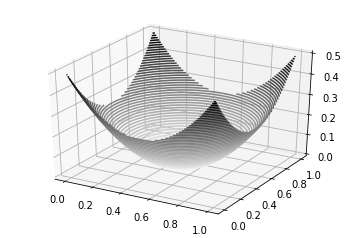

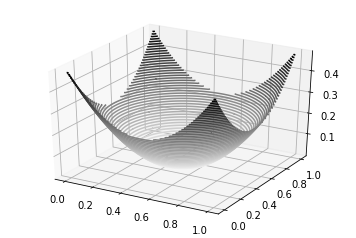

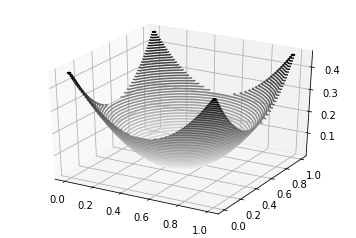

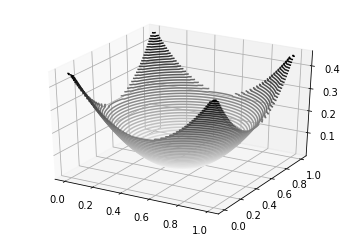

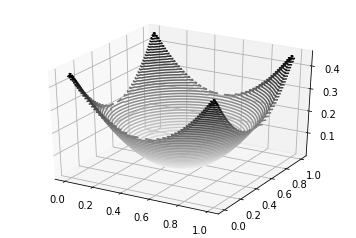

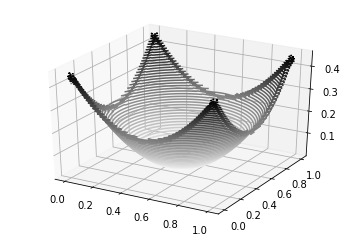

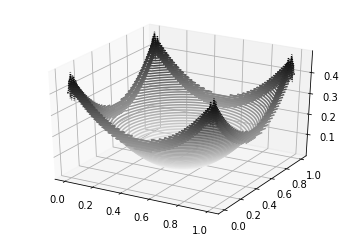

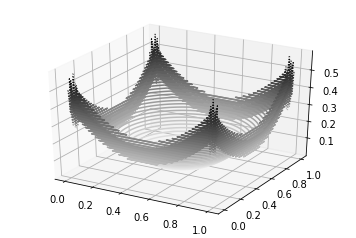

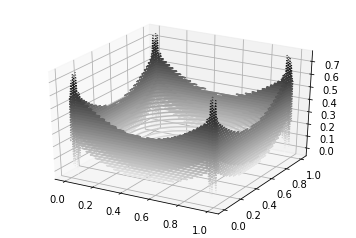

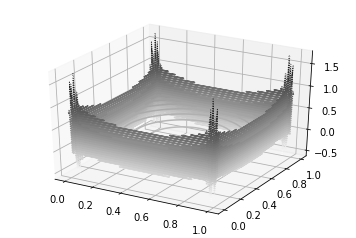

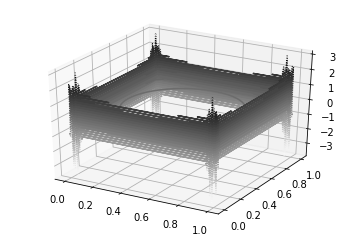

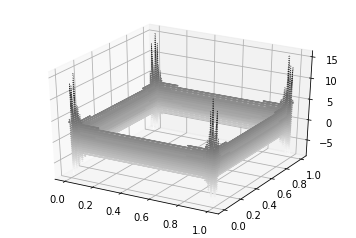

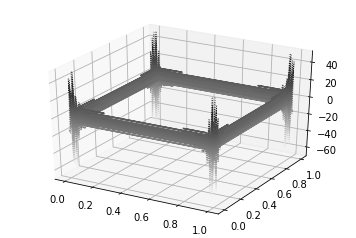

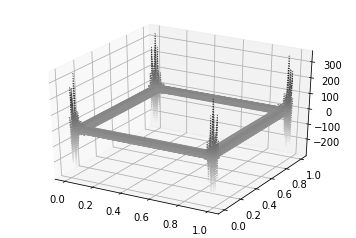

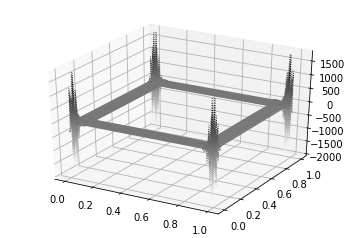

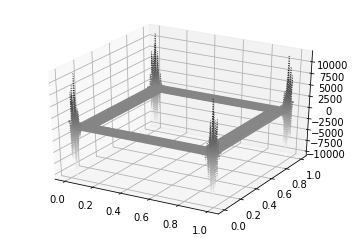

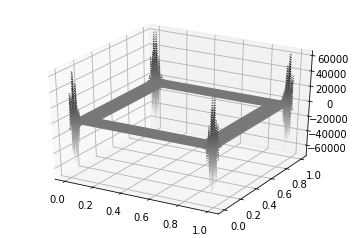

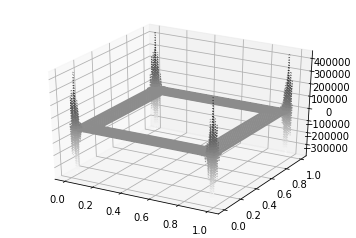

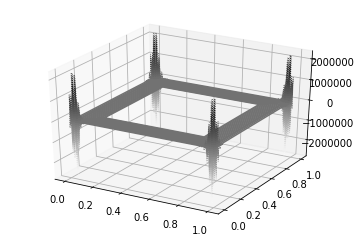

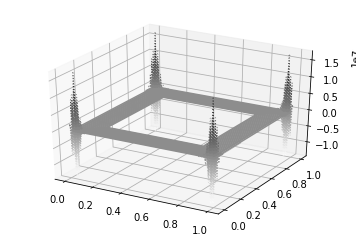

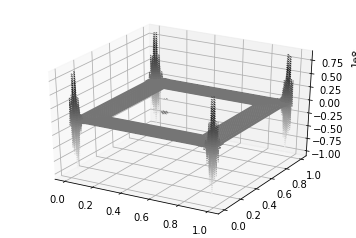

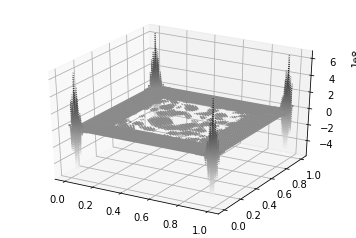

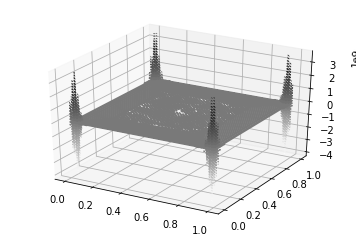

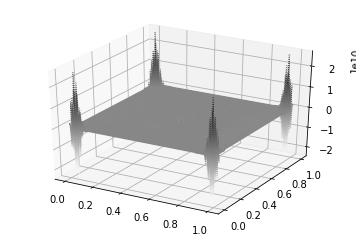

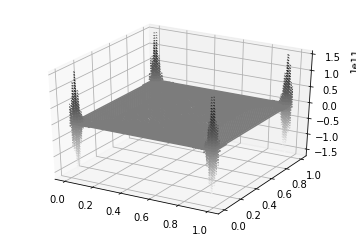

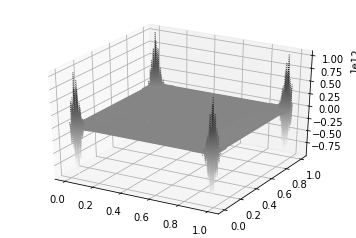

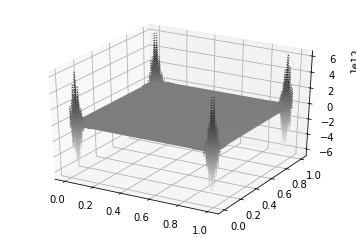

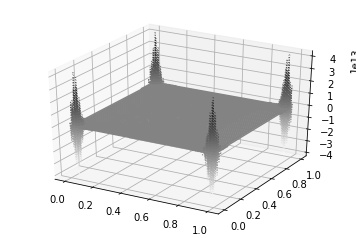

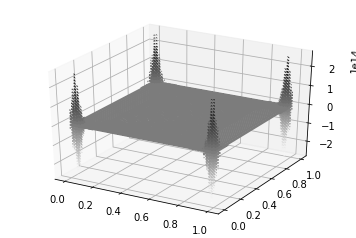

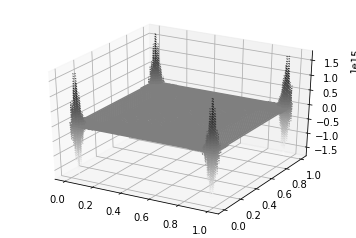

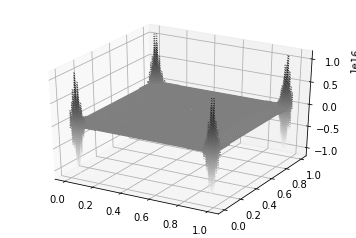

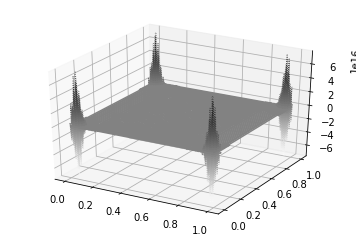

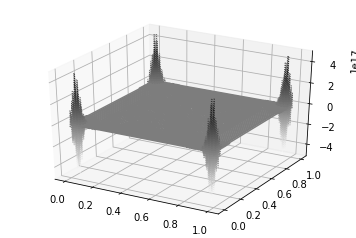

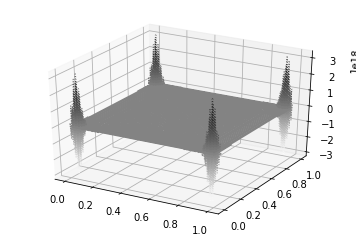

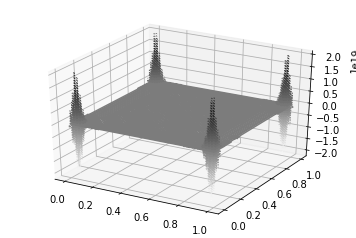

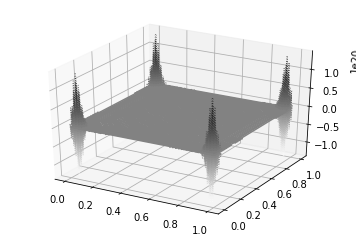

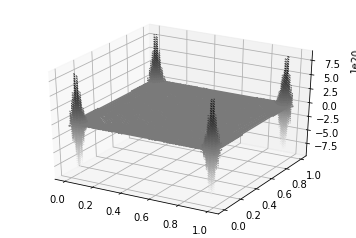

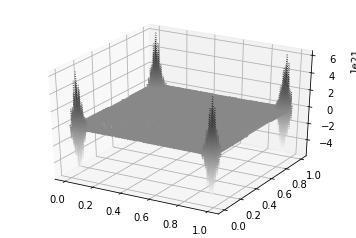

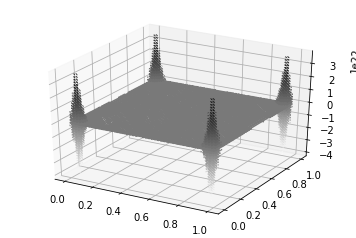

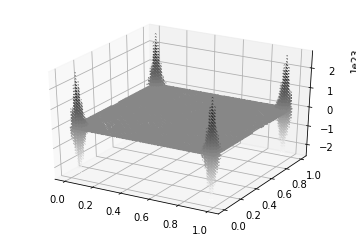

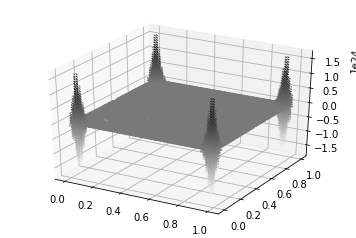

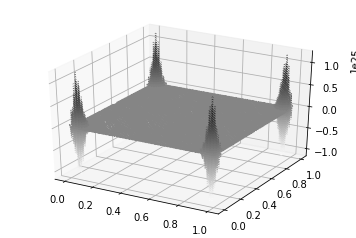

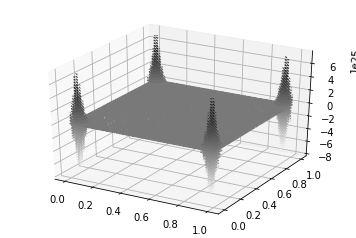

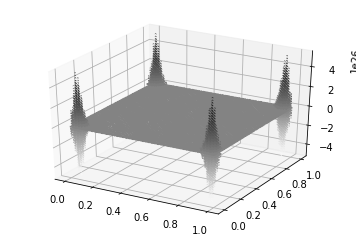

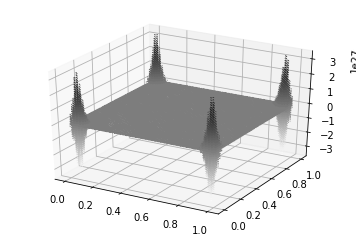

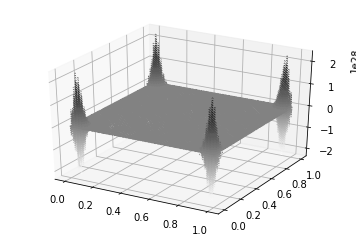

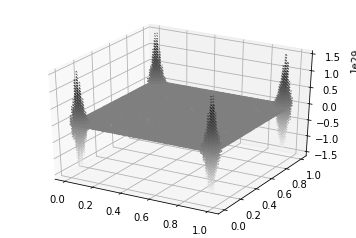

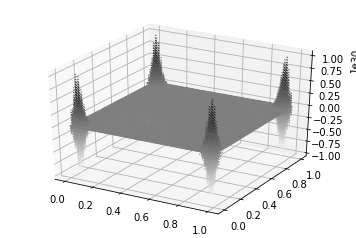

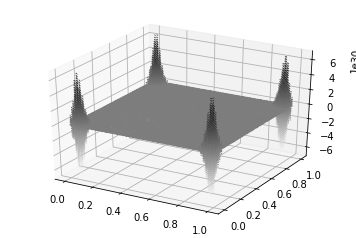

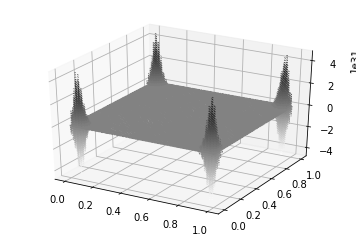

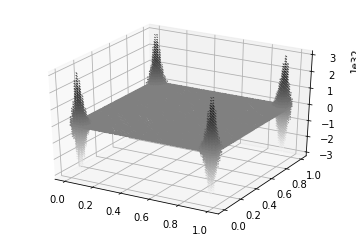

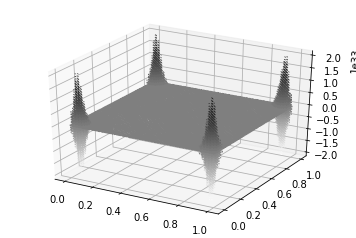

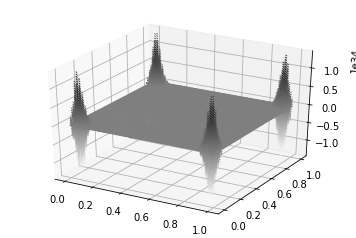

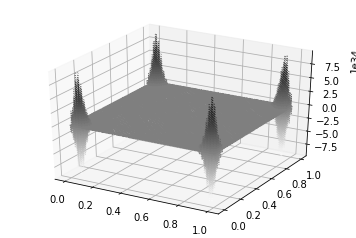

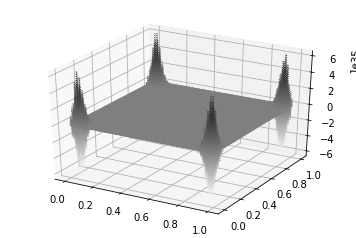

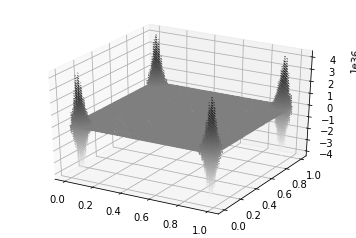

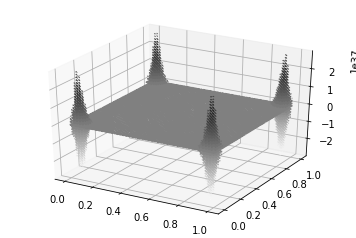

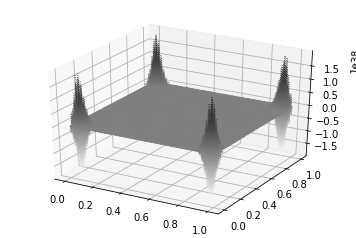

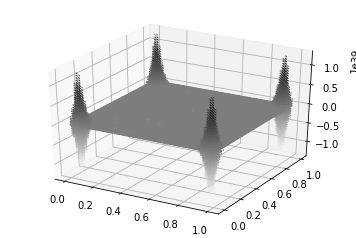

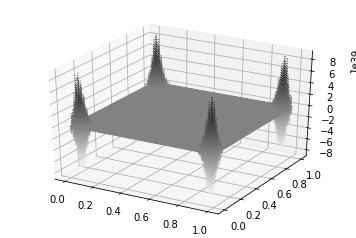

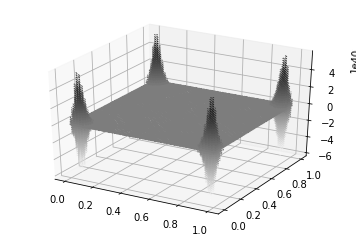

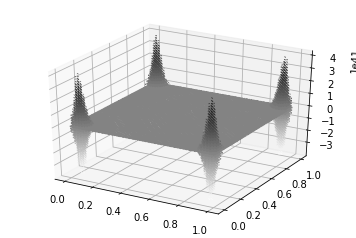

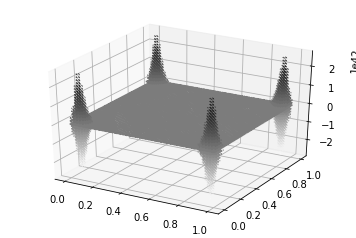

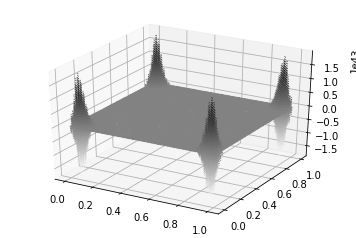

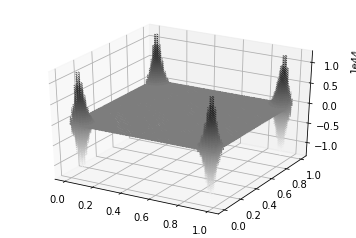

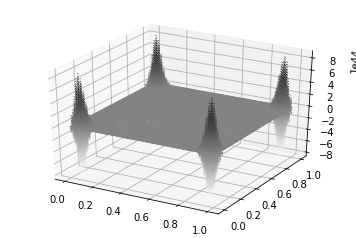

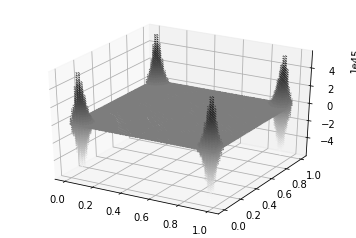

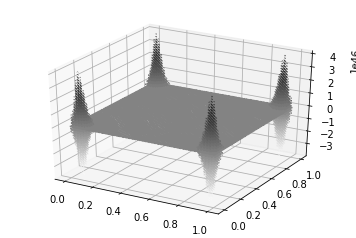

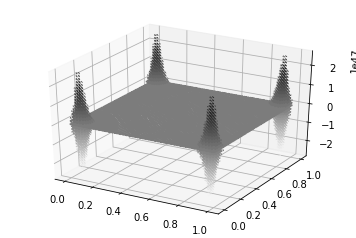

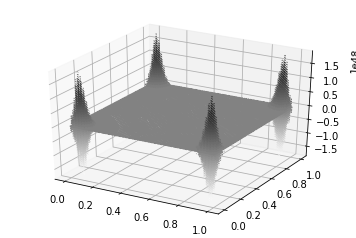

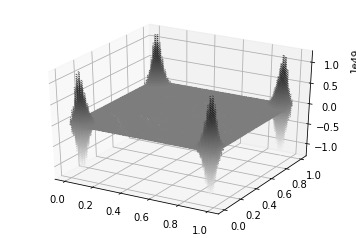

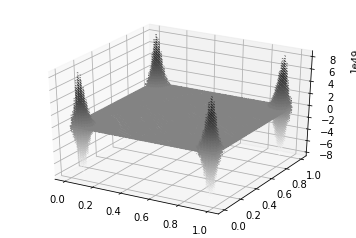

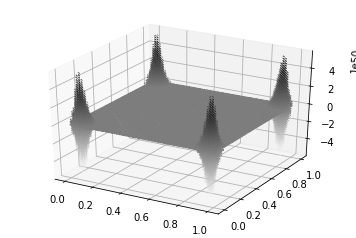

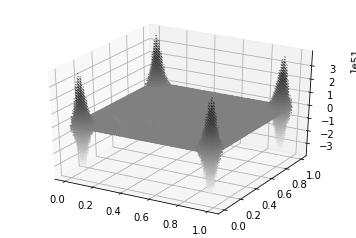

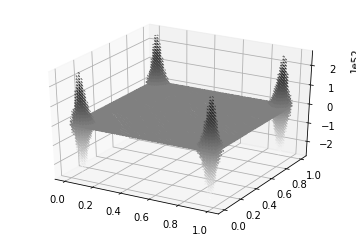

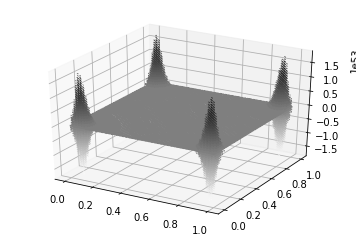

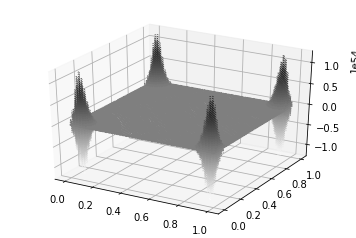

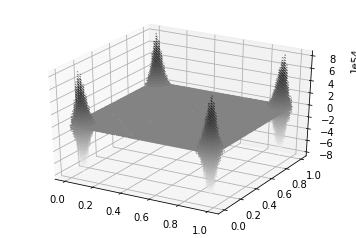

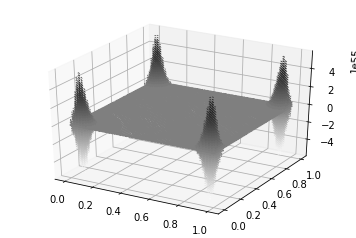

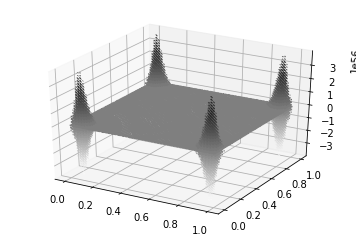

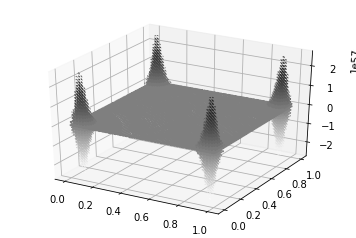

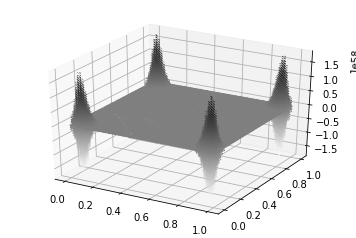

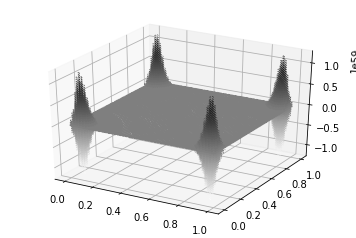

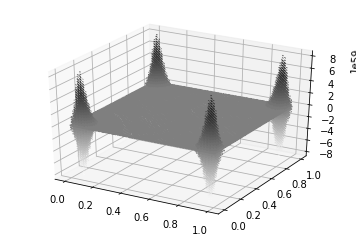

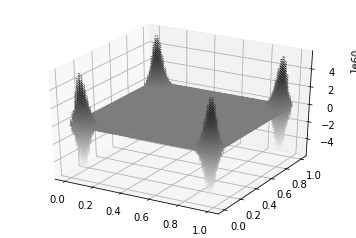

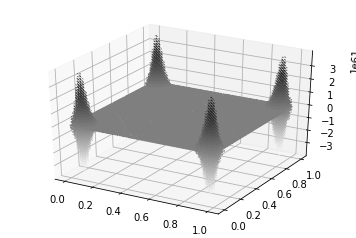

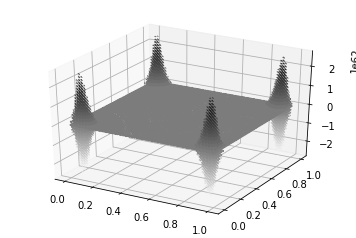

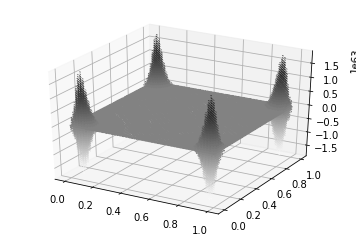

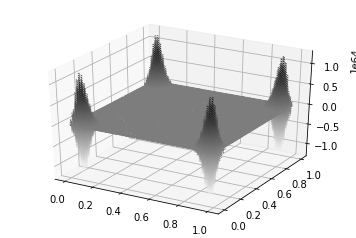

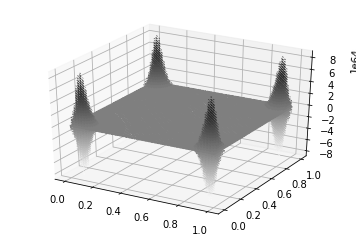

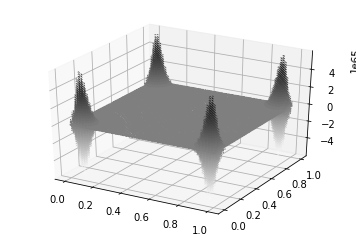

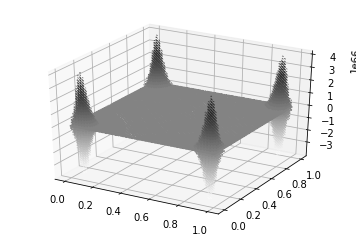

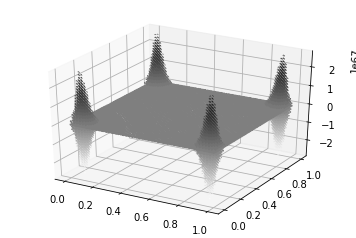

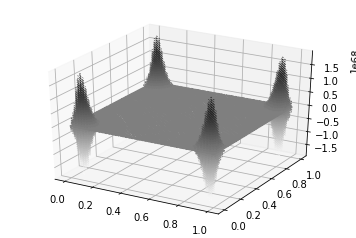

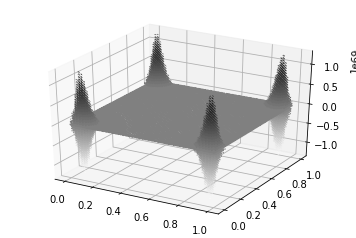

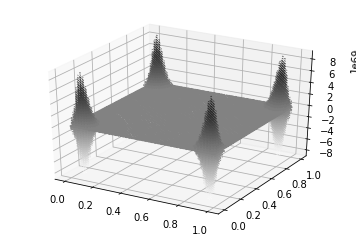

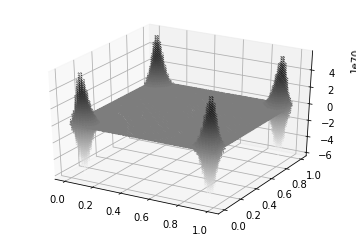

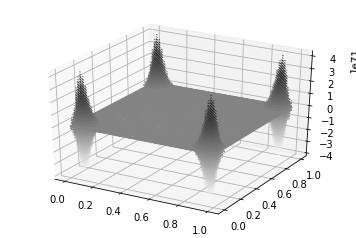

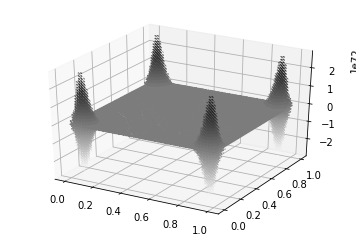

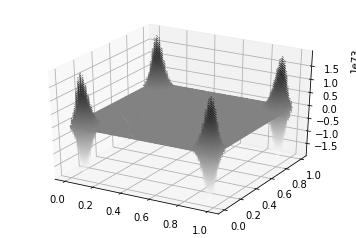

In [97]:
# plot some solutions to see what is going on

for t in range(100):  
    
    x = np.linspace(0, 1, N+2)
    y = np.linspace(0, 1, N+2)

    X, Y = np.meshgrid(x, y)
    
    Z = pde_solution[t]
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')